In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
plt.style.use("seaborn")

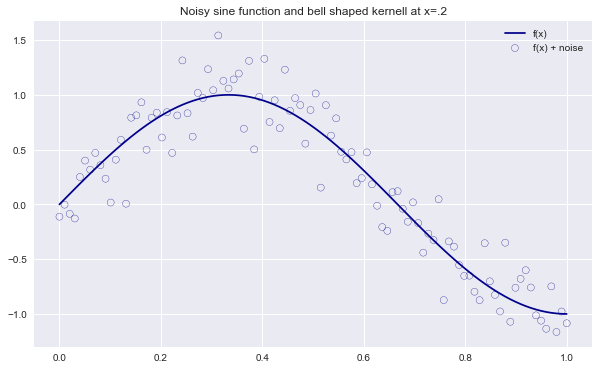

In [ ]:
#Initializing noisy non linear data
x = np.linspace(0,1,100)
noise = np.random.normal(loc = 0, scale = .25, size = 100)
y = np.sin(x * 1.5 * np.pi ) 
y_noise = y + noise

#Plotting the noisy data and the kernell at around x = 0.2
plt.figure(figsize=(10,6))
plt.plot(x,y,color = 'darkblue', label = 'f(x)')
plt.scatter(x,y_noise, facecolors = 'none', edgecolor = 'darkblue',
            label = 'f(x) + noise')
#plt.fill(x[:40],kernel_function(x[:40],0.2,.005), color = 'lime', alpha = .5, label = 'Kernel')
plt.legend()
plt.title('Noisy sine function and bell shaped kernell at x=.2')
plt.show()

In [ ]:
from math import ceil
import numpy as np
from scipy import linalg
#Defining the bell shaped kernel function - used for plotting later on
def kernel_function(xi,x0,tau= .005): 
    return np.exp( - (xi - x0)**2/(2*tau**2))

def lwr(x,y, xtest,tau = .005):
  
    yest = np.zeros(len(xtest))

    #Looping through all x-points
    for i in range(len(xtest)):
        weights= np.array([np.exp(- (x - xtest[i])**2/(2*tau**2))])
        #weights = w[:, i]
        b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
        A = np.array([[np.sum(weights), np.sum(weights * x)],
                    [np.sum(weights * x), np.sum(weights * x * x)]])
        theta = linalg.solve(A, b)
        #invA=linalg.inv(A)
        #theta = invA.dot(b)
        
        yest[i] = theta[0] + theta[1] * xtest[i] 
        
        
        #print(xtest[i], yest[i])
        
    return yest

In [ ]:
tau=0.05
#xtest = np.array([0.2,0.3, 0.5,0.7,0.8])
xtest = np.linspace(0,1,50)
yest_bell = lwr(x,y, xtest, tau)
print(len(xtest), len(yest_bell))

50 50


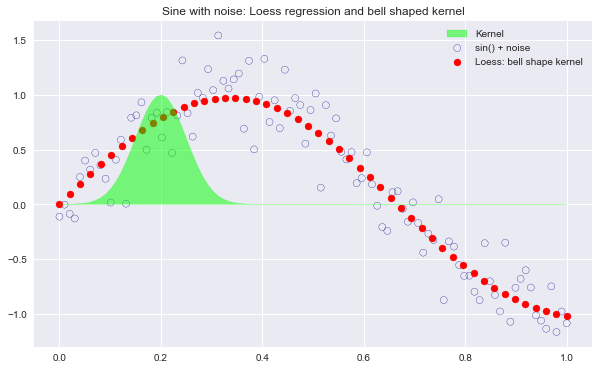

In [ ]:
plt.figure(figsize=(10,6))
#plt.plot(x,y,color = 'darkblue', label = 'sin()')
plt.scatter(x,y_noise, facecolors = 'none', edgecolor = 'darkblue', label = 'sin() + noise')
plt.fill(x,kernel_function(x,0.2,tau), color = 'lime', alpha = .5, label = 'Kernel')
plt.scatter(xtest,yest_bell,color = 'red', label = 'Loess: bell shape kernel')
plt.legend()
plt.title('Sine with noise: Loess regression and bell shaped kernel')
plt.show()